**All tests for (b)** 

In [99]:
from imports import *
from sklearn import datasets
from classes import NeuralNetwork, GradientDescent
#from functions import mse, cross_entropy, mse_der, sigmoid, sigmoid_der, reLU, ReLU_der, identity, identity_der, accuracy, cross_entropy, polynomial_features
from functions import *
import classes
import functions
import imports
import importlib

importlib.reload(classes) 
importlib.reload(functions)
importlib.reload(imports)

<module 'imports' from 'c:\\Users\\Jogga\\Documents\\H25\\FYS-STK4155\\FYS-STK4155_coursework\\Project-2\\Code\\imports.py'>

Finding the best set of hyperparameters yielding the lowest MSE for OLS using fullbatch and SGD for plain, ADAM, and RMSprop. Do plain first.

C:\Users\Jogga\AppData\Local\Temp\ipykernel_32364\1234780276.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


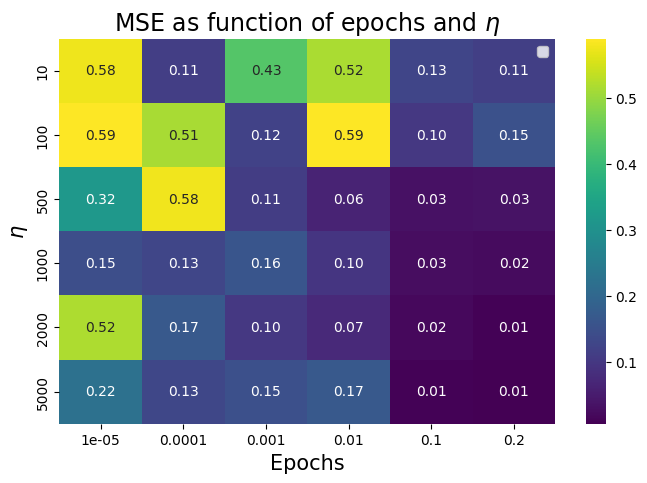

In [110]:
# Plain without stochastic, meaning fullbatch SGD (batch_size=datapoints)

state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

epochs = [10,100,500,1000,2000,5000]
etas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,2e-1]

plot_matrix = np.zeros((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        linreg = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
        linreg.train_SGD(X_train, y_train, epochs=epoch, batch_size=datapoints, learning_rate=eta)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,e] = pointMse

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".2f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel("Epochs", fontsize=15)
ax.set_ylabel(r"$\eta$", fontsize=15)
ax.set_title(r"MSE as function of epochs and $\eta$", fontsize=17)
ax.legend()


save_path = os.path.join(save_dir, "HM_plainFullbatch.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

Best hyperparameters {$\eta$, epochs} for plain SGD (batch_size=32)

C:\Users\Jogga\AppData\Local\Temp\ipykernel_32364\1206029158.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


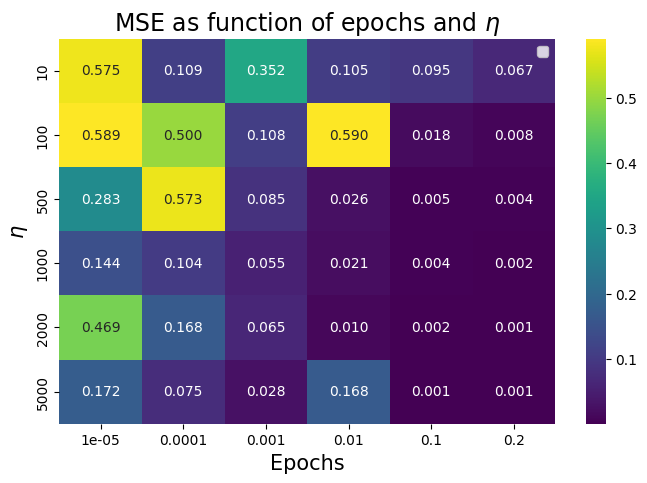

In [112]:
state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

epochs = [10,100,500,1000,2000,5000]
etas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,2e-1]

plot_matrix = np.zeros((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        linreg = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
        linreg.train_SGD(X_train, y_train, epochs=epoch, batch_size=32, learning_rate=eta)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,e] = pointMse

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".3f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel("Epochs", fontsize=15)
ax.set_ylabel(r"$\eta$", fontsize=15)
ax.set_title(r"MSE as function of epochs and $\eta$", fontsize=17)
ax.legend()


save_path = os.path.join(save_dir, "HM_plainSGD.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

Finding the best batchsize given the best {$\eta$, epochs}. Choose {0.2,2000} for practical purposes, since it's the least computationally expensive, and yields about the same MSE as more expensive sets. However, a higher learning rate might cause divergence, and we therefore sometimes use 0.1 since this gives reasonably good results.

C:\Users\Jogga\AppData\Local\Temp\ipykernel_32364\3373173977.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


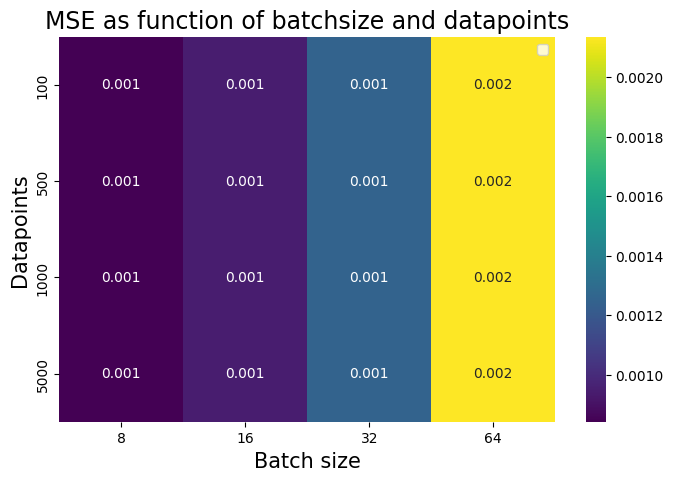

In [118]:
state=50
noise_std=0.01
epoch=2000


datapoints = [100,500,1000,5000]
batches = [8,16,32,64]

plot_matrix = np.zeros((len(datapoints), len(batches)))
for i, dp in enumerate(datapoints):
    for b, batch in enumerate(batches):
        X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, dp, noise_std=noise_std)
        linreg = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
        linreg.train_SGD(X_train, y_train, epochs=epoch, batch_size=batch, learning_rate=eta)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,b] = pointMse

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".3f", cmap="viridis", ax=ax, xticklabels=batches, yticklabels=datapoints)
ax.set_xlabel("Batch size", fontsize=15)
ax.set_ylabel("Datapoints", fontsize=15)
ax.set_title("MSE as function of batchsize and datapoints", fontsize=17)
ax.legend()


save_path = os.path.join(save_dir, "HM_SGD_batchsize_datapoints.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

We note that there is no significant datapoint dependence, and that batchsizes under 64 gives the best results. We use 32 going onward, as being the least computationally expensive. Also, we use 1000 datapoints onward for convenience.

Best hyperparameters for ADAM, i.e. the sets {$\eta$, epochs} and {$\beta_1$, $\beta_2$} yielding the best result (lowest MSE)

C:\Users\Jogga\AppData\Local\Temp\ipykernel_32364\2194270731.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


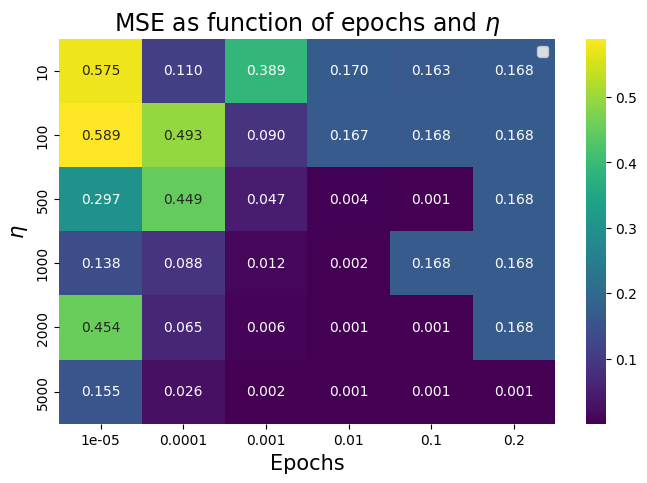

In [ ]:
# Plain without stochastic, meaning fullbatch SGD (batch_size=datapoints)

state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

epochs = [10,100,500,1000,2000,5000]
etas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,2e-1]

plot_matrix = np.zeros((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        linreg = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
        linreg.train_SGD(X_train, y_train, epochs=epoch, batch_size=32, learning_rate=eta, functional=NN_ADAM)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,e] = pointMse

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".3f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel("Epochs", fontsize=15)
ax.set_ylabel(r"$\eta$", fontsize=15)
ax.set_title(r"MSE as function of epochs and $\eta$", fontsize=17)
ax.legend()


save_path = os.path.join(save_dir, "HM_ADAM_fullbatch.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

Then test for SGD ADAM

C:\Users\Jogga\AppData\Local\Temp\ipykernel_32364\839890689.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


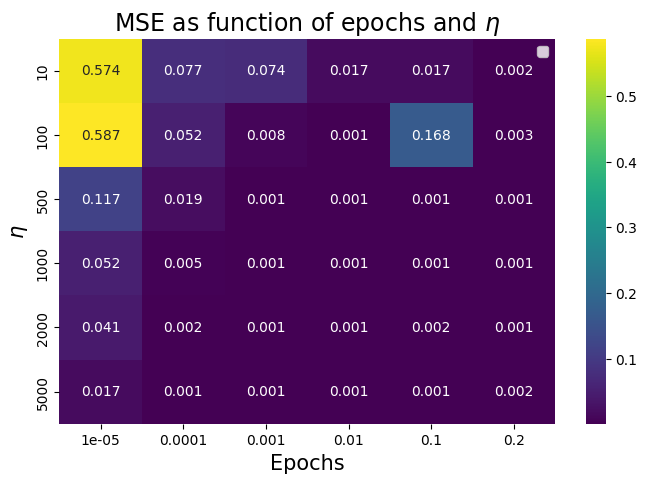

In [121]:
state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)

epochs = [10,100,500,1000,2000,5000]
etas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,2e-1]

plot_matrix = np.zeros((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        linreg = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
        linreg.train_SGD(X_train, y_train, epochs=epoch, batch_size=32, learning_rate=eta, functional=NN_ADAM)
        pred = linreg.feed_forward(X_test)
        pointMse = mse(y_test, pred)
        plot_matrix[i,e] = pointMse

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_matrix, annot=True, fmt=".3f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel("Epochs", fontsize=15)
ax.set_ylabel(r"$\eta$", fontsize=15)
ax.set_title(r"MSE as function of epochs and $\eta$", fontsize=17)
ax.legend()


save_path = os.path.join(save_dir, "HM_ADAM_SGD.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

Test for best {$\beta_1, \beta_2$} values with $\eta$=0.1, epochs=2000 for ADAM fullbatch. Any point?

Testing for linear regression with the best hyperparameters

done with ALL compartmentalization!!!


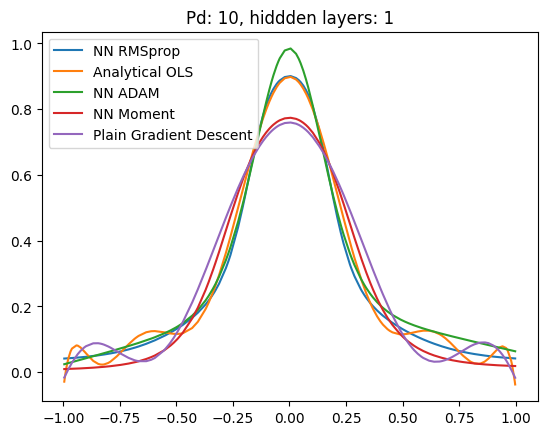

In [ ]:
from classes import *

np.random.seed(50)

n = 1000
x = np.linspace(-1, 1, n).reshape(-1, 1)
y = runge(x) +  np.random.normal(0, 0.01, x.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(x_train.reshape(-1,1))
Y_train = scaler_y.fit_transform(y_train.reshape(-1,1))

X_test = scaler_X.transform(x_test.reshape(-1,1))
Y_test = scaler_y.transform(y_test.reshape(-1,1))


# Moment
linreg3 = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
linreg3.train_SGD(X_train, y_train, epochs=500, batch_size=32, learning_rate=0.1, functional=NN_Moment)
pred_Mom = linreg3.feed_forward(X_test)

# ADAM
LinReg = NeuralNetwork(1, [50,1], [sigmoid, identity], [sigmoid_der, identity_der], mse, mse_der)
LinReg.train_SGD(X_train, y_train, epochs=500, batch_size=32, learning_rate=0.1, functional=NN_ADAM)
y_pred = LinReg.feed_forward(X_test)

# RMSprop
linreg2 = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
linreg2.train_SGD(X_train, y_train, epochs=500, batch_size=32, learning_rate=0.1, functional=NN_RMS)
pred_ = linreg2.feed_forward(X_test)

np.random.seed(50)
x = np.linspace(-1, 1, n)
y = 1/(1 + 25 * x**2) +  np.random.normal(0, 0.01, n)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

n = 10
X = polynomial_features(x_train, n)
Y = polynomial_features(x_test, n)


scaler = StandardScaler(with_mean=True, with_std=True)
Xtr_s = scaler.fit_transform(X)
Xte_s = scaler.transform(Y)   

y_mean = np.mean(y_train)
y_centered = y_train - y_mean
g = GradientDescent(Xtr_s,5000, y_train, eps=1e-5, l1=False)
ols_betas = g.gradOrd(5000, eta=0.2)
predGD = Xte_s@ols_betas + y_mean
analytical_betas = ols(Xtr_s, y_train)
predOls = Xte_s@analytical_betas + y_mean

sort_indices = np.argsort(x_test.flatten())
print("done with ALL compartmentalization!!!")

plt.plot(x_test[sort_indices], pred_[sort_indices], label="NN RMSprop")
plt.plot(x_test[sort_indices], predOls[sort_indices], label="Analytical OLS")
plt.plot(x_test[sort_indices], y_pred[sort_indices], label="NN ADAM")
plt.plot(x_test[sort_indices], pred_Mom[sort_indices], label="NN Moment")
plt.plot(x_test[sort_indices], predGD[sort_indices], label="Plain Gradient Descent")
plt.title("Pd: 10, hiddden layers: 1")
#plt.plot(x,y, label="Runge")
plt.legend()


Comparing MSE scores

In [ ]:
print("MSE for OLS using NN RMSprop:", round(mse(pred_.flatten(), y_test), 4))
print("MSE for analytical OLS:", round(mse(predOls, y_test), 4))
print("MSE for OLS using NN ADAM:", round(mse(y_pred.flatten(), y_test), 4))

MSE for OLS using NN RMSprop: 0.0004
MSE for analytical OLS: 0.0017
MSE for OLS using NN ADAM: 0.0002


Comparing analytical OLS and OLS from gradient descent with Neural Net with two layers using 50 and 100 nodes respectively

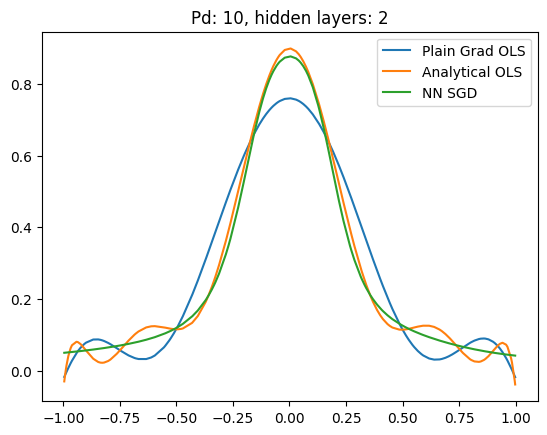

In [100]:
state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)
Xtr_s, Xte_s, x_trainP1, x_testP1, y_trainP1, y_testP1 = create_and_scale_dataP1(state, datapoints, noise_std)

LinReg = NeuralNetwork(1, [50,100, 1], [sigmoid, sigmoid, sigmoid], [sigmoid_der, sigmoid_der, sigmoid_der], mse, mse_der)
LinReg.train_SGD(X_train, y_train, learning_rate=0.2, epochs=500, batch_size=32)
y_pred = LinReg.feed_forward(X_test)

y_mean = np.mean(y_train)
y_centered = y_trainP1 - y_mean
g = GradientDescent(Xtr_s,5000, y_trainP1, eps=1e-5, l1=False)
ols_betas = g.gradOrd(5000, eta=0.2)
pred_ = Xte_s@ols_betas + y_mean
analytical_betas = ols(Xtr_s, y_trainP1)
predOls = Xte_s@analytical_betas + y_mean

sort_indicesP1 = np.argsort(x_testP1.flatten())
sort_indices = np.argsort(x_test.flatten())

plt.plot(x_testP1[sort_indicesP1], pred_[sort_indicesP1], label="Plain Grad OLS")
plt.plot(x_testP1[sort_indicesP1], predOls[sort_indicesP1], label="Analytical OLS")
plt.plot(x_test[sort_indices],y_pred[sort_indices], label="NN SGD")
plt.title("Pd: 10, hidden layers: 2")
#plt.plot(x,y, label="Runge")
plt.legend()

Calculating and comparing MSE values

In [ ]:
print("MSE for Plain gradient OLS:", round(mse(pred_, y_test), 4))
print("MSE for analytical OLS:", round(mse(predOls, y_test), 4))
print("MSE for OLS using Neural Net:", round(mse(y_pred.flatten(), y_test), 4))

MSE for Plain gradient OLS: 0.0073
MSE for analytical OLS: 0.0016
MSE for OLS using Neural Net: 0.0


Testing for 2D Runge

In [ ]:
np.random.seed(50)

n = 100
x = np.linspace(-1, 1, n).reshape(-1, 1)
y = runge2d(x,x) +  np.random.normal(0, 0.1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(x_train.reshape(-1,1))
Y_train = scaler_y.fit_transform(y_train.reshape(-1,1))

X_test = scaler_X.transform(x_test.reshape(-1,1))
Y_test = scaler_y.transform(y_test.reshape(-1,1))

LinReg = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
LinReg.train_SGD(X_train, y_train, eta=0.2, n_epochs=5000)
y_pred = LinReg.feed_forward(X_test)

y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()

X, Y = np.meshgrid(x, x)

Z = runge2d(X,Y)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='plasma', rstride=5, cstride=5) 

ax.set_title("")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis (f(x, y))')


TypeError: train_SGD() got an unexpected keyword argument 'n_epochs'